
# APPLICATION OF MACHINE LEARNING IN SUPPLY CHAIN MANAGEMENT

Dataset taken here for study of Supply Chains is from the company DataCo Global. This dataset contains the information regarding: Provisioning, Production, Sales, Commercial Distribution. It also allows the correlation of structured data with unstructured data for knowledge generation. The objective of the study is to perceive shipment time, demand forecasting, sales analysis and sales forecasting. This study would enable E-commerce and goods/products delivery industries to identify the risk of late delivery and predict the fastest and norm al duration of goods shipment for their Inland and foreign customers.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset using pandas
data=pd.read_excel("Application of ML in SCM.xlsx")

In [3]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-03-02 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


**Exploratory Data Analysis(EDA)**

In [4]:
data.shape

(180519, 53)

There are 180519 rows and 53 columns in the data set

In [5]:
data["shipping date (DateOrders)"] = pd.to_datetime(data["shipping date (DateOrders)"])

In [6]:
data["order date (DateOrders)"] = pd.to_datetime(data["order date (DateOrders)"])

In [7]:
data.dtypes.value_counts()

object            22
float64           15
int64             14
datetime64[ns]     2
dtype: int64

In [8]:
columns = data.applymap(np.isreal).all()
print((columns).value_counts())

True     31
False    22
dtype: int64


It gives number of categorical and numberical values . There are 22 categorical values in the dataset and 31 continuous values

In [9]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [10]:
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [11]:
data.nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

**UNIVARIATE ANALYSIS OF DATA**

DELIVERY STATUS STUDY

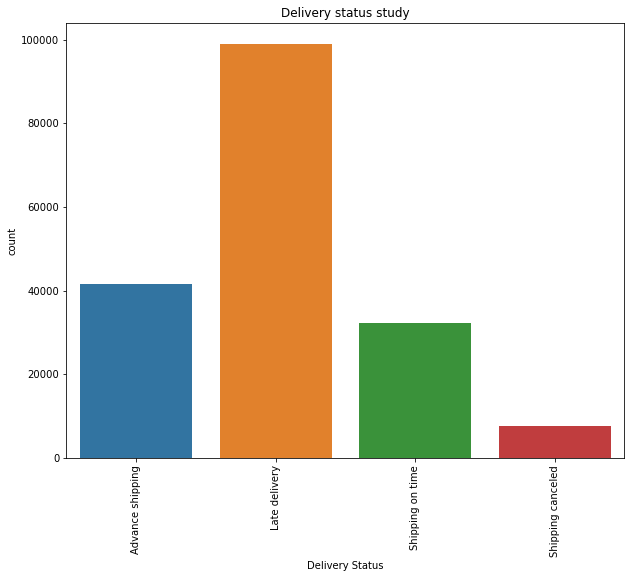

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(data["Delivery Status"])
plt.title('Delivery status study')
plt.xticks(rotation='vertical')
plt.show()

This graph shows the count of delivery status. It can be seen from the graph that count of Late delivery is significantly larger than all others

In [14]:
data1=pd.DataFrame(data["Delivery Status"].value_counts())
data1

,Delivery Status
Late delivery,98977
Advance shipping,41592
Shipping on time,32196
Shipping canceled,7754


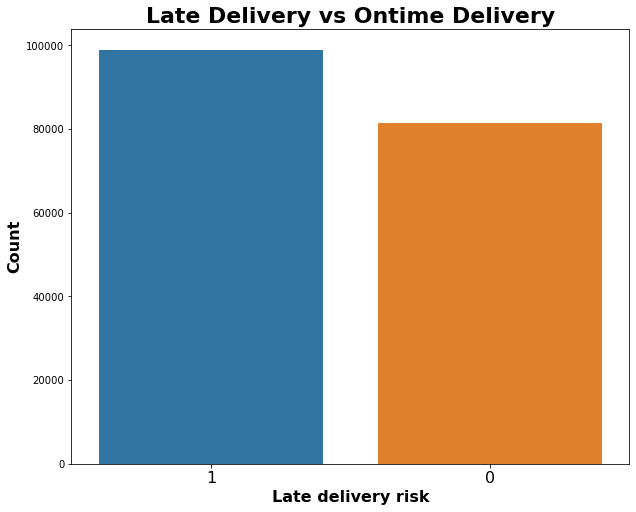

In [15]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x=data['Late_delivery_risk'],
                   order=data['Late_delivery_risk'].value_counts(ascending=False).index);
        
abs_values = data['Late_delivery_risk'].value_counts(ascending=False)
rel_values = data['Late_delivery_risk'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

plt.title('Late Delivery vs Ontime Delivery', fontsize=22,fontweight="bold")
plt.ylabel('Count', fontsize=16,fontweight="bold")
plt.xlabel('Late delivery risk',fontsize=16,fontweight="bold")
plt.xticks(fontsize=16)
plt.show()

0 represents delivery completed without any delay and 1 represents late delivery. 

It can been seen that more than 50% of the total items did not reached on expected date.

MARKET STUDY

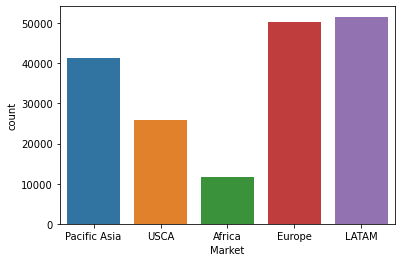

In [16]:
sns.countplot(data["Market"])
plt.show()

From the above we can understand that most of the order has been opted by the customers are from LATAM

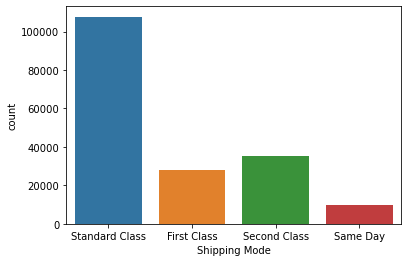

In [17]:
sns.countplot(data["Shipping Mode"] )
plt.show()

From the analysis, we can understand that the shipping  mode is mostly done by STANDARD CLASS way.

In [18]:
ds=data[(data['Order Item Profit Ratio']<=0)]
print("There are",len(ds), "items which has been sold at loss by the various company")

There are 34961 items which has been sold at loss by the various company


array([<AxesSubplot:ylabel='Order Status'>], dtype=object)

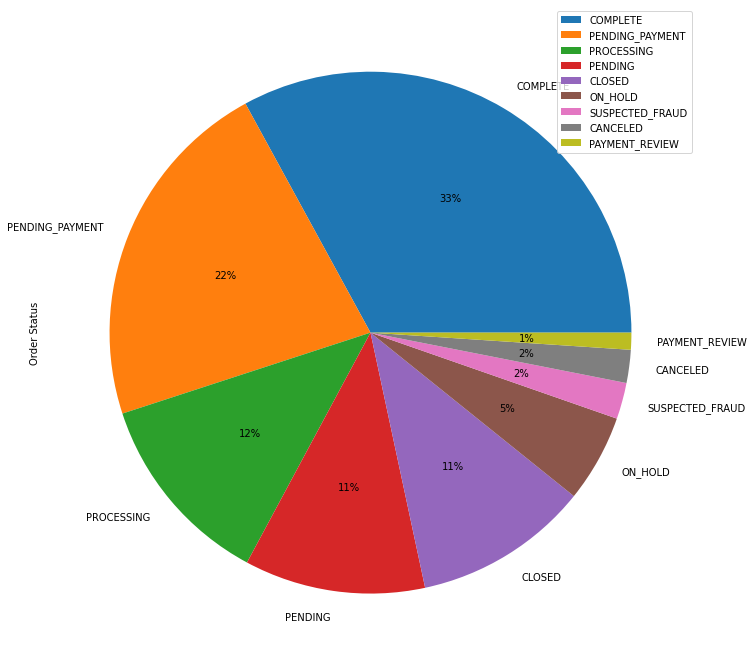

In [19]:
ds1=pd.DataFrame(data["Order Status"].value_counts())
ds1
ds1.plot.pie(subplots=True,figsize=(15, 12),autopct='%1.0f%%')

The above pie chart rrepresents the status of the order in percentage wise. And from the above it specifies about 33% of the total order has been delivered.

SALES BOX PLOT

<AxesSubplot:xlabel='Sales'>

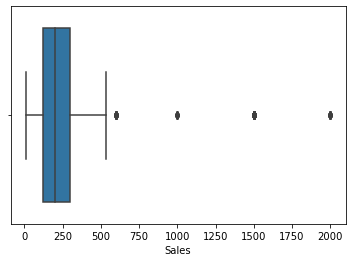

In [20]:
sns.boxplot(data["Sales"])

ACUTAL DELIVERY TIME

<AxesSubplot:xlabel='Days for shipping (real)'>

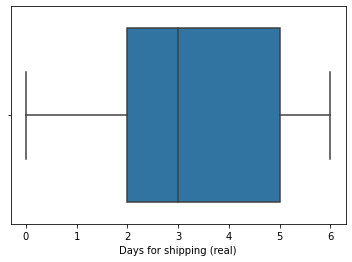

In [21]:
sns.boxplot(data["Days for shipping (real)"])

SHIPMENT ITEMS

In [22]:
print("The company DataCo Supply ships",data["Category Name"].nunique(),"items as listed below")
data["Category Name"].value_counts()

The company DataCo Supply ships 50 items as listed below


Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Garden                    484
Crafts                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics      431
Boxing & MMA              423
Books     

**BIVARIATE ANALAYSIS OF DATA**

Text(0.5, 0, 'order date')

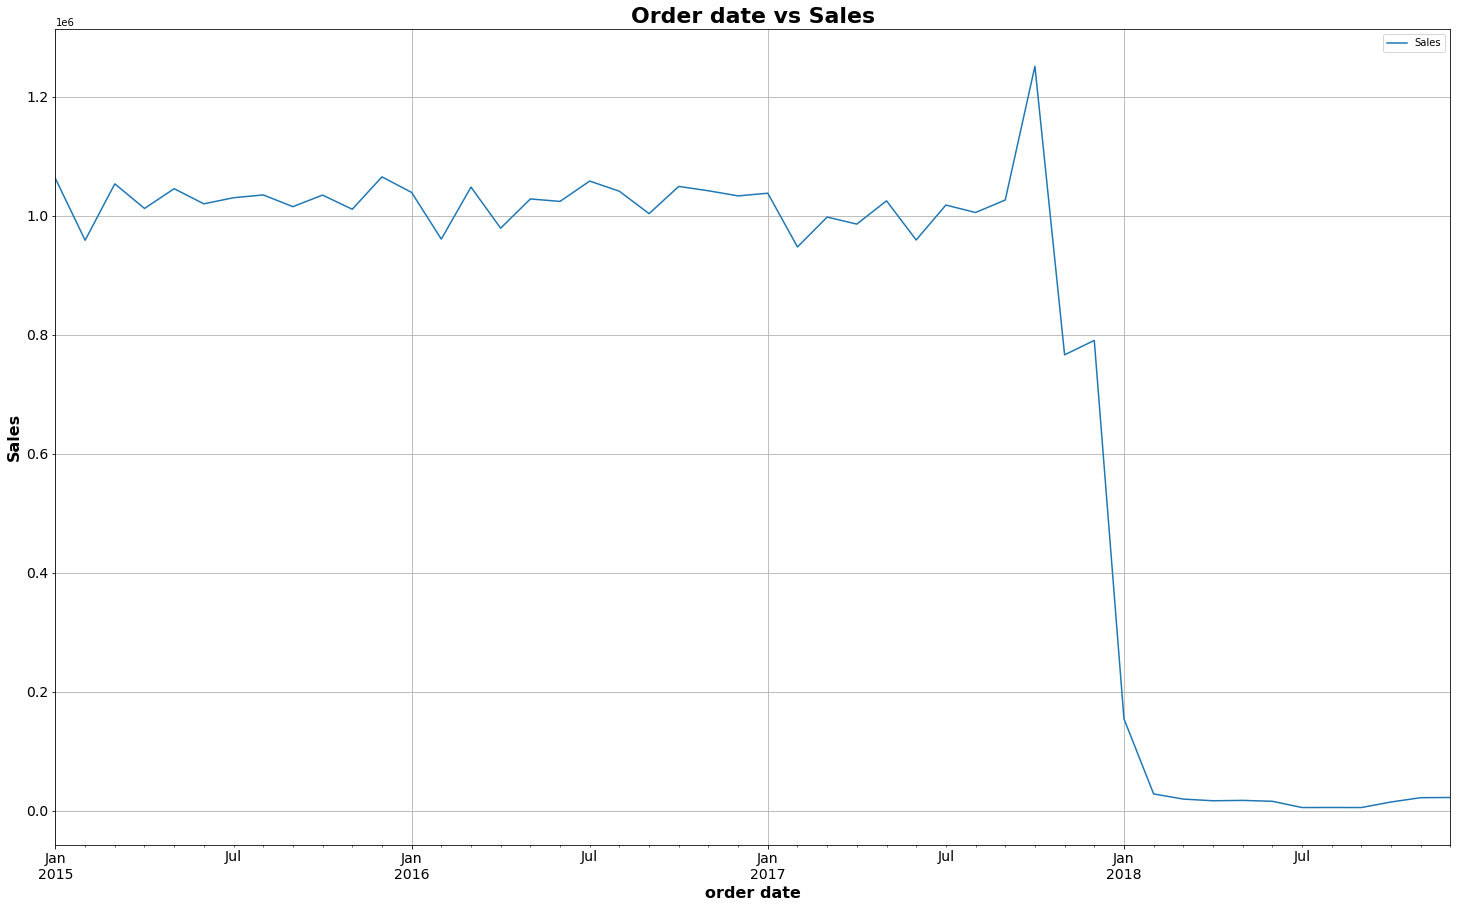

In [23]:
df = data[['order date (DateOrders)','Sales']]
df = df.groupby(df['order date (DateOrders)'].dt.to_period('M')).sum()
df = df.resample('M').asfreq().fillna(0)
df.sort_values(by='order date (DateOrders)',ascending=False).plot(kind='line',grid='Axis grid lines',fontsize=14,figsize=(25, 15))
plt.title('Order date vs Sales', fontsize=22,fontweight="bold")
plt.ylabel('Sales', fontsize=16,fontweight="bold")
plt.xlabel('order date', fontsize=16,fontweight="bold")

This graph gives the monthly sales. we can see a uniform pattern from 2015 to 2017 August. Maximum sales was during the month of october 2017 and then the sales plummet drastically

COMPANY IMPORTS AND EXPORTS

In [24]:
print("The Shipment is done between",data["Order Country"].nunique(), "and" ,data['Customer Country'].nunique())

The Shipment is done between 164 and 2


The above analysis clearly specifies that the company only has customer orders from 2 countries and they import the items to the customer from 164 countries

FRADULENT SUSPECTION

In [25]:
df=data[(data['Order Status']=='SUSPECTED_FRAUD')]
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
10,TRANSFER,6,2,130.580002,272.029999,Shipping canceled,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-19 09:18:00,Second Class
24,TRANSFER,2,2,90.279999,288.420013,Shipping canceled,0,73,Sporting Goods,Billings,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-15 04:24:00,Second Class


In [26]:
cunt=df['Order Country'].value_counts()
cunt

Estados Unidos     573
Francia            362
México             317
Alemania           227
Australia          197
                  ... 
Jamaica              1
Camboya              1
Costa de Marfil      1
Bangladés            1
Georgia              1
Name: Order Country, Length: 102, dtype: int64

In [27]:
df['Customer Country'].value_counts()

EE. UU.        2413
Puerto Rico    1649
Name: Customer Country, dtype: int64

The highest number of fradulent suspection is found from  Estados Unidos.

Text(0, 0.5, 'Fradulent count')

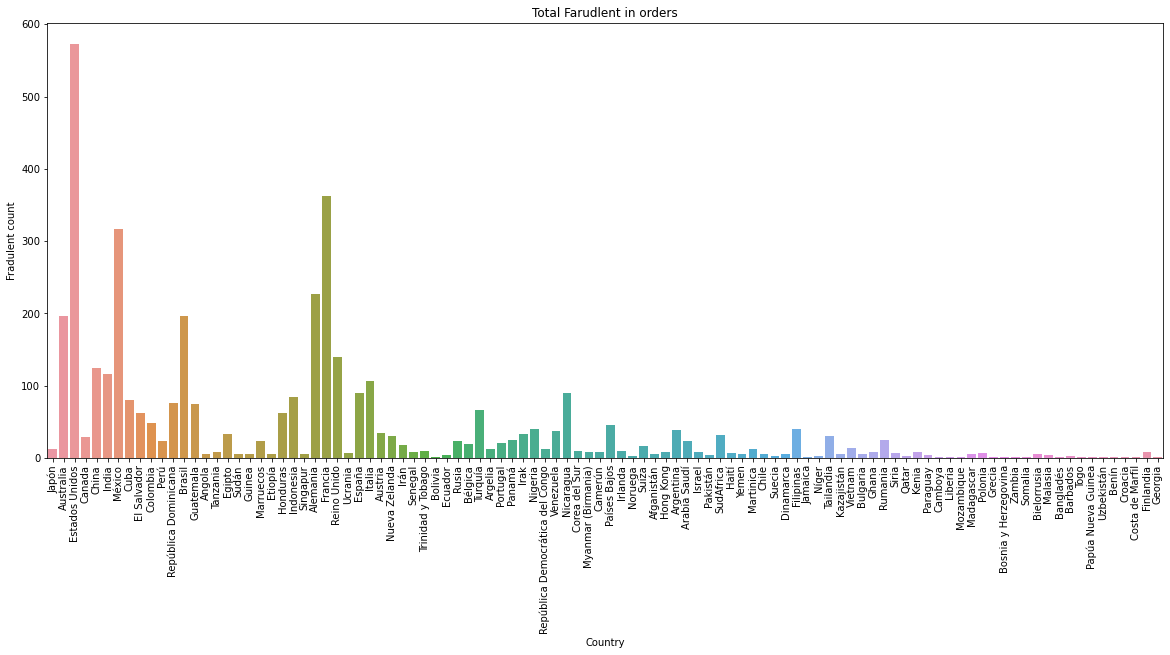

In [28]:
plt.figure(figsize=(20,8))
sns.countplot(df['Order Country'])
plt.title('Total Farudlent in orders')
plt.xlabel('Country')
plt.xticks(rotation='vertical')
plt.ylabel('Fradulent count')

ORDER MADE FROM INDIAN CITIES

In [29]:
df3=pd.DataFrame(data[(data['Order Country']=='India') & (data['Order Status']=='COMPLETE') & (data['Delivery Status']=='Shipping on time') &(data['Shipping Mode']=='Same Day')])
print("shape of the frame is ", df3.shape)
df3.head(2)


shape of the frame is  (22, 53)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
2740,DEBIT,0,0,29.110001,64.68,Shipping on time,0,7,Hockey,Roswell,...,NaN,135,7,NaN,http://images.acmesports.sports/Nike+Dri-FIT+C...,Nike Dri-FIT Crew Sock 6 Pack,22.00,0,2015-12-28 20:25:00,Same Day
38995,DEBIT,0,0,3.670000,10.50,Shipping on time,0,61,CDs,Caguas,...,NaN,1348,61,NaN,http://images.acmesports.sports/CDs+of+rock,CDs of rock,11.29,0,2017-12-19 23:37:00,Same Day


In [30]:
a=df3[['Order City', 'Order Item Quantity']]
a

,Order City,Order Item Quantity
2740,Solapur,3
38995,Chandigarh,1
44232,Nagpur,1
44233,Nagpur,1
44265,Nagpur,1
44268,Nagpur,1
44276,Bangalore,1
44611,Nagpur,3
47888,Solapur,1
47889,Hyderabad,1


The items which are ordered from India and are delivered on same day via standard shipping mode are listed above. 

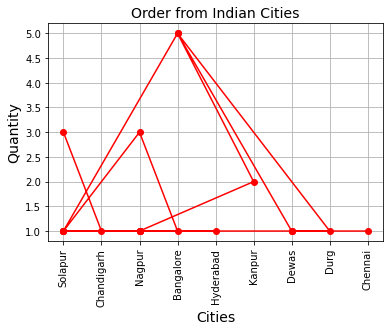

In [31]:
plt.plot(a['Order City'], a['Order Item Quantity'], color='red', marker='o')
plt.title('Order from Indian Cities', fontsize=14)
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Order Item Profit Ratio', ylabel='Order Item Discount'>

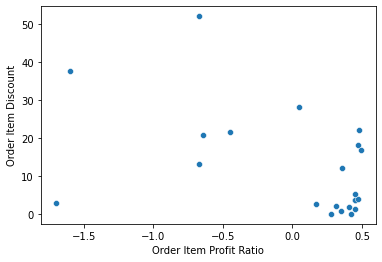

In [32]:
sns.scatterplot(df3['Order Item Profit Ratio'],df3['Order Item Discount'])

<AxesSubplot:xlabel='Days for shipping (real)', ylabel='Days for shipment (scheduled)'>

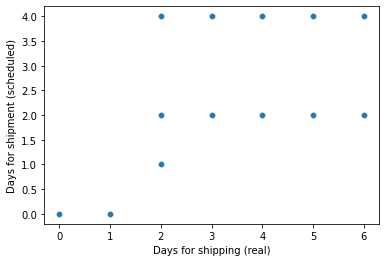

In [33]:
sns.scatterplot(data['Days for shipping (real)'],data['Days for shipment (scheduled)'])

In [34]:
df4=data[['Order Region','Order Item Total']]
df4=df4.groupby('Order Region').sum()
df4= df4.reset_index()
df4

,Order Region,Order Item Total
0,Canada,1.682574e+05
1,Caribbean,1.481669e+06
2,Central Africa,2.929126e+05
3,Central America,5.093850e+06
4,Central Asia,9.795369e+04
5,East Africa,3.380543e+05
6,East of USA,1.231955e+06
7,Eastern Asia,1.334313e+06
8,Eastern Europe,6.963072e+05
9,North Africa,5.722420e+05


Text(0, 0.5, 'Items sold')

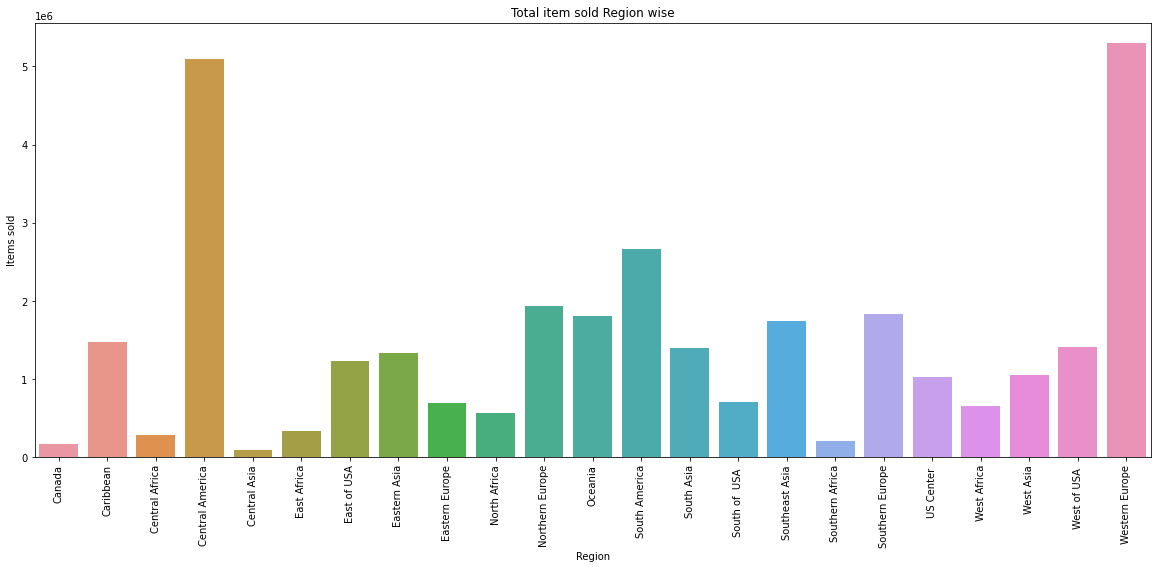

In [35]:
plt.figure(figsize=(20,8))
sns.barplot(x="Order Region", y="Order Item Total", data=df4)
plt.title('Total item sold Region wise')
plt.xlabel('Region')
plt.xticks(rotation='vertical')
plt.ylabel('Items sold')

CORRELATION

In [36]:
data1= data.drop(['Sales per customer', 'Category Name','Customer Email', 'Customer Fname','Customer Password','Department Id', 'Department Name', 'Latitude', 'Longitude', 'Order Id', 'Order Item Cardprod Id','Sales','Order Profit Per Order','Order Zipcode', 'Product Card Id', 'Product Category Id','Product Description', 'Product Image','Product Price'], axis='columns')
data1.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Category Id,Customer City,Customer Country,Customer Id,...,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Region,Order State,Order Status,Product Name,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,Advance shipping,0,73,Caguas,Puerto Rico,20755,...,0.29,1,314.640015,Southeast Asia,Java Occidental,COMPLETE,Smart watch,0,2018-03-02 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,Late delivery,1,73,Caguas,Puerto Rico,19492,...,-0.80,1,311.359985,South Asia,Rajastán,PENDING,Smart watch,0,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,Shipping on time,0,73,San Jose,EE. UU.,19491,...,-0.80,1,309.720001,South Asia,Rajastán,CLOSED,Smart watch,0,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,Advance shipping,0,73,Los Angeles,EE. UU.,19490,...,0.08,1,304.809998,Oceania,Queensland,COMPLETE,Smart watch,0,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,Advance shipping,0,73,Caguas,Puerto Rico,19489,...,0.45,1,298.250000,Oceania,Queensland,PENDING_PAYMENT,Smart watch,0,2018-01-15 11:24:00,Standard Class


# Pre Processing

Pre-processing refers to the transformations applied to our data before feeding it to the algorithm. Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

# MISSING  VALUE

Missing values  are values which are not stored in a dataset during observations. Missing values can alter the results so that it should be removed from the dataset before Modeling.


In [37]:
data.isnull().sum() # To find the missing values in each feature

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


Most of the values in order Zipcode and Product Description column are missing,these columns are going to be deleted. 3 values in customer zipcode and 8 Customer Lname is missing.

In [38]:
data= data.drop(['Product Description','Order Zipcode'],axis='columns')
# Since majority of data in these columns are missing we can remove these columns from the dataset.

In [39]:
# to obtain the rows where "Customer Lname" is null
data[data['Customer Lname'].isnull()]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
41422,DEBIT,5,4,165.360001,337.459992,Late delivery,1,63,Children's Clothing,Caguas,...,Java Central,COMPLETE,1350,63,http://images.acmesports.sports/Children+heaters,Children's heaters,357.100006,0,2017-12-26 19:40:00,Standard Class
50447,DEBIT,2,4,213.690002,436.100006,Advance shipping,0,66,Crafts,Palatine,...,Estocolmo,COMPLETE,1353,66,http://images.acmesports.sports/Porcelain+crafts,Porcelain crafts,461.480011,0,2017-09-11 14:50:00,Standard Class
86260,TRANSFER,5,4,152.440002,419.950012,Late delivery,1,66,Crafts,Los Angeles,...,Guangdong,PENDING,1353,66,http://images.acmesports.sports/Porcelain+crafts,Porcelain crafts,461.480011,0,2018-01-01 19:19:00,Standard Class
92621,TRANSFER,2,1,-4.860000,194.240005,Late delivery,1,76,Women's Clothing,Caguas,...,Capital Nacional,PENDING,1363,76,http://images.acmesports.sports/Summer+dresses,Summer dresses,215.820007,0,2017-12-15 07:25:00,First Class
97530,DEBIT,4,2,82.540001,242.759995,Late delivery,1,65,Consumer Electronics,San Antonio,...,Lombardía,ON_HOLD,1352,65,http://images.acmesports.sports/Industrial+con...,Industrial consumer electronics,252.880005,0,2017-04-11 20:37:00,Second Class
120404,TRANSFER,3,4,157.830002,415.329987,Advance shipping,0,66,Crafts,Fayetteville,...,Renania del Norte-Westfalia,PENDING,1353,66,http://images.acmesports.sports/Porcelain+crafts,Porcelain crafts,461.480011,0,2017-10-11 01:10:00,Standard Class
166129,PAYMENT,2,2,-59.279999,296.390015,Shipping on time,0,63,Children's Clothing,Honolulu,...,Java Oriental,PENDING_PAYMENT,1350,63,http://images.acmesports.sports/Children+heaters,Children's heaters,357.100006,0,2017-12-23 16:52:00,Second Class
167119,PAYMENT,2,4,15.050000,200.710007,Advance shipping,0,76,Women's Clothing,Reseda,...,Uttar Pradesh,PENDING_PAYMENT,1363,76,http://images.acmesports.sports/Summer+dresses,Summer dresses,215.820007,0,2018-01-29 08:14:00,Standard Class


In [40]:
data['Customer Lname']=data['Customer Lname'].fillna('NA')

All null values in Customer Lname is filled with NA(Not Applicable)

In [41]:
data[data['Customer Lname'].isnull()]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode


There is no null value pesent in this field now

In [42]:
#To show all columns
pd.set_option('display.max_columns', None)

# to Obtain the rows where "Customer Zipcode" is null
data[data['Customer Zipcode'].isnull()]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
35704,DEBIT,2,1,66.379997,189.660004,Late delivery,1,65,Consumer Electronics,CA,EE. UU.,XXXXXXXXX,Sara,14577,Foreman,XXXXXXXXX,Consumer,95758,Elk Grove,NaN,10,Technology,39.134159,-123.718552,Europe,Valence,Francia,14577,2017-02-11 18:31:00,71024,1352,63.220001,0.25,174339,252.880005,0.35,1,252.880005,189.660004,66.379997,Western Europe,Auvernia-Ródano-Alpes,COMPLETE,1352,65,http://images.acmesports.sports/Industrial+con...,Industrial consumer electronics,252.880005,0,2017-04-11 18:31:00,First Class
46440,PAYMENT,4,4,10.910000,38.959999,Shipping on time,0,75,Video Games,CA,EE. UU.,XXXXXXXXX,Eugenia,17171,Slater,XXXXXXXXX,Corporate,95758,Elk Grove,NaN,9,Discs Shop,38.408573,-121.449112,Pacific Asia,Manila,Filipinas,17171,2017-10-12 15:18:00,73618,1362,0.800000,0.02,176933,39.750000,0.28,1,39.750000,38.959999,10.910000,Southeast Asia,Capital Nacional,PENDING_PAYMENT,1362,75,http://images.acmesports.sports/Fighting+video...,Fighting video games,39.750000,0,2017-12-14 15:18:00,Standard Class
82511,DEBIT,4,4,59.990002,299.959992,Shipping on time,0,63,Children's Clothing,CA,EE. UU.,XXXXXXXXX,Zena,14046,Elliott,XXXXXXXXX,Consumer,91732,El Monte,NaN,4,Apparel,34.071892,-118.013886,Europe,Sheffield,Reino Unido,14046,2017-10-26 00:29:00,70493,1350,57.139999,0.16,173808,357.100006,0.20,1,357.100006,299.959992,59.990002,Northern Europe,Inglaterra,COMPLETE,1350,63,http://images.acmesports.sports/Children+heaters,Children's heaters,357.100006,0,2017-10-30 00:29:00,Standard Class


In [43]:
data['Customer Zipcode']=data['Customer Zipcode'].fillna(data['Customer State'])

here the zipcode in customer state column is filled in zipcode field

In [44]:
# to Obtain the rows where "Customer Zipcode" is null
data[data['Customer Zipcode'].isnull()]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode


there is no null values present in Customer Zipcode column now

In [45]:
#to get number of unique values in each column
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns], 
                                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
48,Product Status,1
15,Customer Password,1
11,Customer Email,1
10,Customer Country,2
6,Late_delivery_risk,2
16,Customer Segment,3
0,Type,4
50,Shipping Mode,4
5,Delivery Status,4
2,Days for shipment (scheduled),4


Product Status,Customer Password and Customer Email contain only 1 unique values

In [46]:
data['Product Status'].value_counts()

0    180519
Name: Product Status, dtype: int64

In [47]:
data['Customer Password'].value_counts()

XXXXXXXXX    180519
Name: Customer Password, dtype: int64

In [48]:
data['Customer Email'].value_counts()

XXXXXXXXX    180519
Name: Customer Email, dtype: int64

Product status only contain zero, and other two contain no values. hence dropping this 3 columns

In [49]:
data= data.drop(['Product Status','Customer Password','Customer Email'],axis='columns')


# Outlier Detection

An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors.

The IQR describes the middle 50% of values when ordered from lowest to highest. To find the interquartile range (IQR), ​first find the median (middle value) of the lower and upper half of the data. These values are quartile 1 (Q1) and quartile 3 (Q3). The IQR is the difference between Q3 and Q1.

Low_lim = Q1 - 1.5*IQR

Up_lim = Q3 + 1.5*IQR

In [50]:
data_copy=data.copy()

In [51]:
def Out_data(df):
    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            print("Checking outliers in ",col,"\n")
            
            Q1 = np.percentile(df[col], 25, interpolation='midpoint') 
            Q2 = np.percentile(df[col], 50, interpolation='midpoint')
            Q3 = np.percentile(df[col], 75, interpolation='midpoint')
            print ("Q1 :", Q1)
            print ("Q2 :", Q2)
            print ("Q3 :", Q3)
            IQR = Q3 -Q1
            Low_lim = Q1 - 2*IQR
            Up_lim = Q3 + 2*IQR
            print("\nInter Quartile Range : ",IQR)
            print("Lower Limit : ",Low_lim)
            print("Upper Limit : ",Up_lim)
            
            outlier = []
            for x in df[col]:
                if ((x > Up_lim) or (x <= Low_lim)):
                    outlier.append(x)
            
            print("\n No. of outliers:" , len(outlier),"\n")
            
            if(((len(outlier))> 0)):
                index_names = df[ (df[col] > Up_lim) | (df[col] <= Low_lim) ].index
                df.drop(index_names, inplace = True)
                print(len(index_names),' Rows containing outliers are deleted from the dataset')
                print('*-----*-------*--------*-------*-------* ','\n\n')
            else:
                print("No outliers present in ",col)
                print('*-----*-------*--------*-------*-------* ','\n\n')
        else:
            df[col]=df[col]
            print(col,' column is categorical\n')
            print('*-----*-------*--------*-------*-------* ','\n\n')
    return df
new_data=Out_data(data)
new_data

Type  column is categorical

*-----*-------*--------*-------*-------*  


Checking outliers in  Days for shipping (real) 

Q1 : 2.0
Q2 : 3.0
Q3 : 5.0

Inter Quartile Range :  3.0
Lower Limit :  -4.0
Upper Limit :  11.0

 No. of outliers: 0 

No outliers present in  Days for shipping (real)
*-----*-------*--------*-------*-------*  


Checking outliers in  Days for shipment (scheduled) 

Q1 : 2.0
Q2 : 4.0
Q3 : 4.0

Inter Quartile Range :  2.0
Lower Limit :  -2.0
Upper Limit :  8.0

 No. of outliers: 0 

No outliers present in  Days for shipment (scheduled)
*-----*-------*--------*-------*-------*  


Checking outliers in  Benefit per order 

Q1 : 7.0
Q2 : 31.52000046
Q3 : 64.80000305

Inter Quartile Range :  57.80000305
Lower Limit :  -108.6000061
Upper Limit :  180.40000915000002

 No. of outliers: 13151 

13151  Rows containing outliers are deleted from the dataset
*-----*-------*--------*-------*-------*  


Checking outliers in  Sales per customer 

Q1 : 100.0
Q2 : 156.7599945
Q3 : 


 No. of outliers: 0 

No outliers present in  Product Category Id
*-----*-------*--------*-------*-------*  


Product Image  column is categorical

*-----*-------*--------*-------*-------*  


Product Name  column is categorical

*-----*-------*--------*-------*-------*  


Checking outliers in  Product Price 

Q1 : 49.97999954
Q2 : 59.99000168
Q3 : 199.9900055

Inter Quartile Range :  150.01000596
Lower Limit :  -250.04001238
Upper Limit :  500.01001742

 No. of outliers: 0 

No outliers present in  Product Price
*-----*-------*--------*-------*-------*  


shipping date (DateOrders)  column is categorical

*-----*-------*--------*-------*-------*  


Shipping Mode  column is categorical

*-----*-------*--------*-------*-------*  




,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Cally,20755,Holloway,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,2018-03-02 22:56:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,Tana,19490,Tate,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Orli,19489,Hendricks,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,2018-01-15 11:24:00,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,EE. UU.,Kimberly,19488,Flowers,Consumer,NY,2122 Hazy Corner,14150.0,2,Fitness,43.013969,-78.879066,Pacific Asia,Toowoomba,Australia,19488,2018-01-13 11:03:00,75935,1360,32.779999,0.10,179250,327.750000,0.06,1,327.750000,294.980011,18.580000,Oceania,Queensland,CANCELED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,2018-01-19 11:03:00,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Constance,19487,Terrell,Home Office,PR,1879 Green Pine Bank,725.0,2,Fitness,18.242538,-66.037056,Pacific Asia,Guangzhou,China,19487,2018-01-13 10:42:00,75934,1360,39.330002,0.12,179249,327.750000,0.33,1,327.750000,288.420013,95.180000,Eastern Asia,Guangdong,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,2018-01-15 10:42:00,First Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180510,PAYMENT,3,4,165.990005,331.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,Melissa,7,Wilcox,Corporate,PR,9453 High Concession,725.0,7,Fan Shop,18.359095,-66.079956,Pacific Asia,Guangshui,China,7,2016-01-16 06:49:00,26052,1004,68.000000,0.17,65201,399.980011,0.50,1,399.980011,331.980011,165.990005,Eastern Asia,Hubei,PENDING_PAYMENT,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2016-01-19 06:49:00,Standard Class
180511,DEBIT,2,2,157.429993,327.980011,Shipping on time,0,45,Fishing,Chula Vista,EE. UU.,Olivia,9314,Smith,Consumer,CA,3760 Stony Promenade,91911.0,7,Fan Shop,32.611141,-117.073662,Pacific Asia,Che

In [52]:
data.shape

(157711, 48)

outliers in each coumn is checked and removed in this step, the data now contains 157711 rows out of 180519.  Highest number of outliers is present in Item Benefit per order (13151).

# Feature Reduction

The purpose of using feature reduction is to reduce the number of features. (or variables). Feature reduction leads to the need for fewer resources to complete computations or tasks.

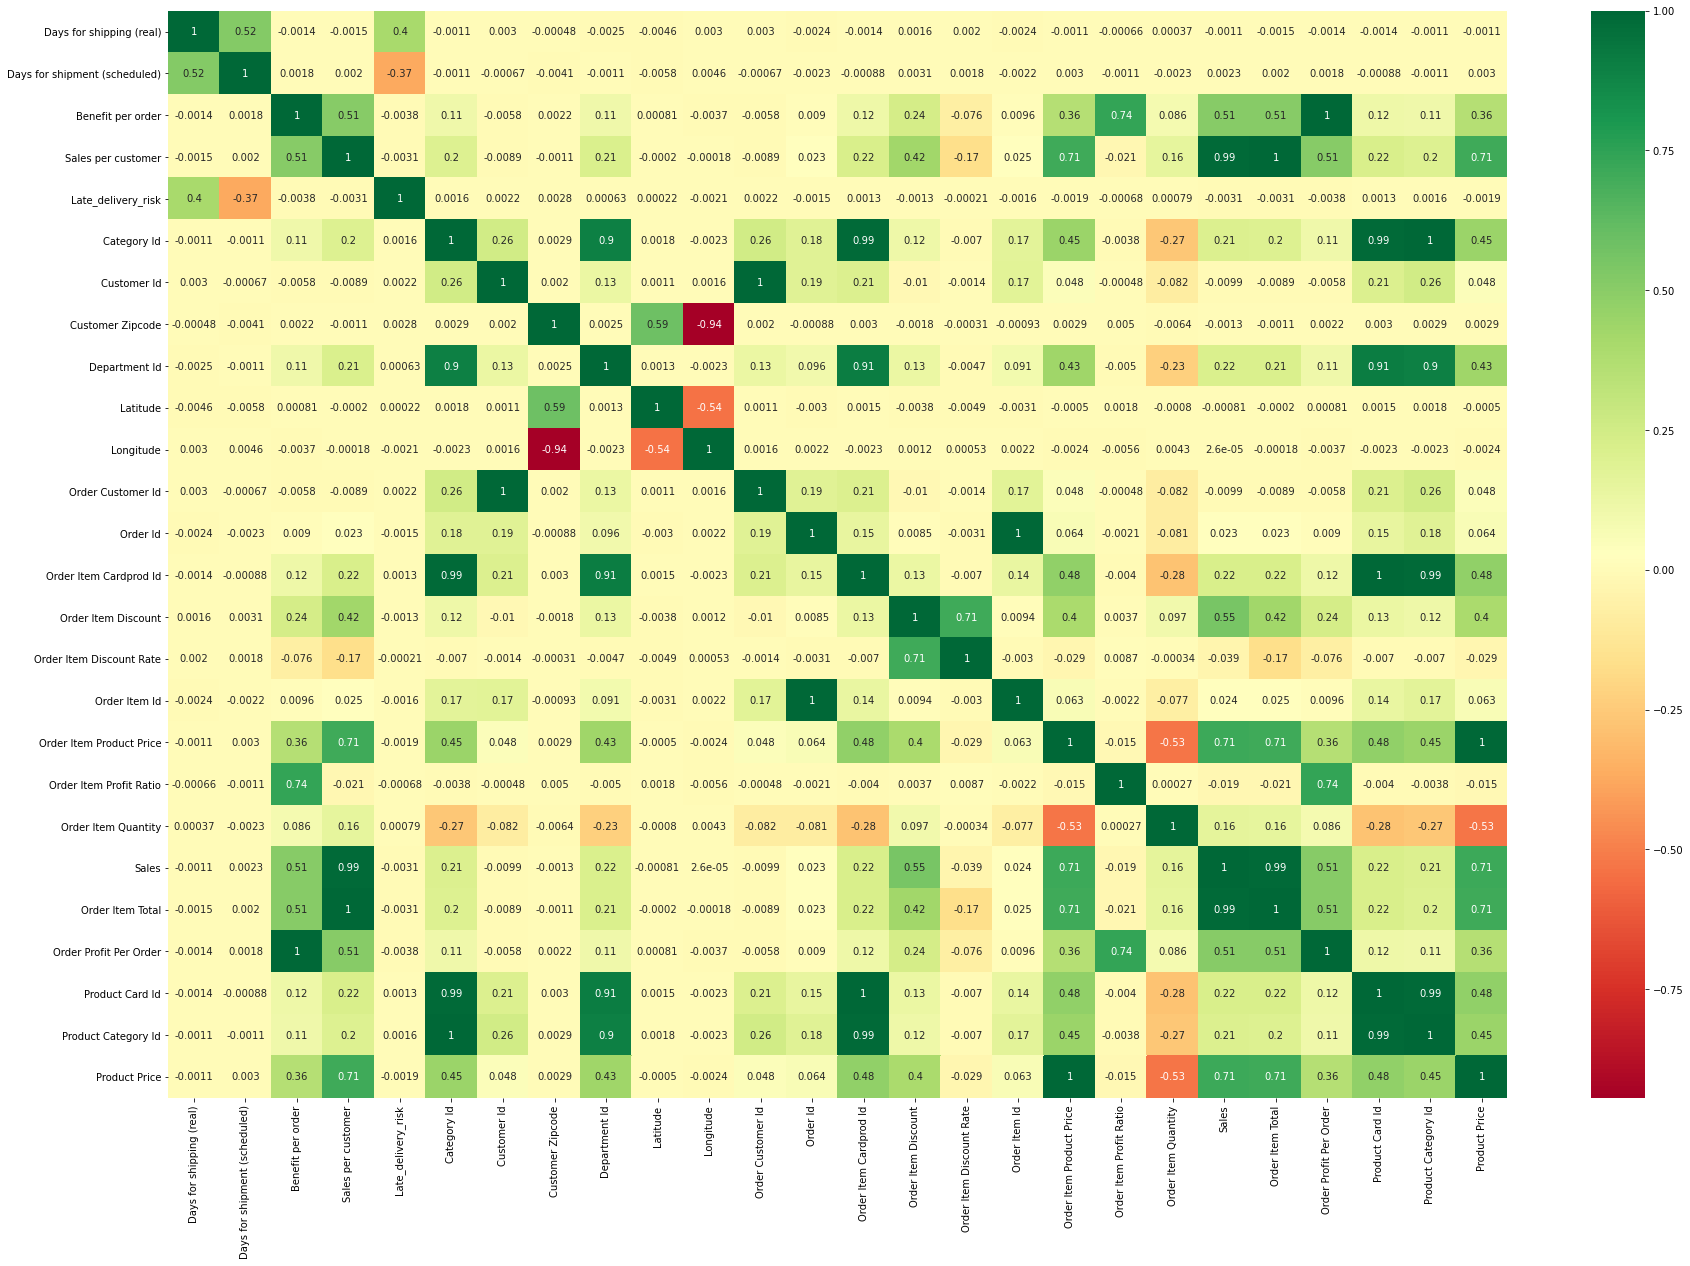

In [53]:
# plotting correlation map
corrmap = data.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(data[top].corr(),annot=True,cmap="RdYlGn")

#### Column with similar values are
1. 'Benefit per order' and 'Order Profit Per Order'
2. 'Customer Id' and 'Order Customer Id'
3. 'Category Id' and 'Product Category Id'
4. 'Product Price' and 'Order Item Product Price'
5. 'Sales per customer' and 'Order Item Total'
6. 'Order Item Cardprod Id' and 'Product Card Id'

In [54]:
#Dropping columns containing similar values

In [55]:
data=data.drop(['Benefit per order','Order Customer Id','Product Category Id','Order Item Product Price',
                 'Order Item Total', 'Order Item Cardprod Id'],axis='columns')

### Splitting dataset into smaller datasets for domain usage and easier modelling

1. Shipment details
2. Finance details

In [56]:
shipment_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk',
                     'Order Profit Per Order','Sales per customer','Latitude','Longitude','Shipping Mode','Order Status',
                     'Order Region','Order Country','Order City','Market','Delivery Status','Product Card Id']
shipment = data[shipment_features]
shipment.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Order Profit Per Order,Sales per customer,Latitude,Longitude,Shipping Mode,Order Status,Order Region,Order Country,Order City,Market,Delivery Status,Product Card Id
0,DEBIT,3,4,0,91.250000,314.640015,18.251453,-66.037056,Standard Class,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,Advance shipping,1360
3,DEBIT,3,4,0,22.860001,304.809998,34.125946,-118.291016,Standard Class,COMPLETE,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,1360
4,PAYMENT,2,4,0,134.210007,298.250000,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,1360
5,TRANSFER,6,4,0,18.580000,294.980011,43.013969,-78.879066,Standard Class,CANCELED,Oceania,Australia,Toowoomba,Pacific Asia,Shipping canceled,1360
6,DEBIT,2,1,1,95.180000,288.420013,18.242538,-66.037056,First Class,COMPLETE,Eastern Asia,China,Guangzhou,Pacific Asia,Late delivery,1360


In [57]:
finance_features=['Order Profit Per Order','Sales per customer','Order Item Discount','Order Item Discount Rate',
                  'Product Price','Order Item Profit Ratio','Product Card Id']
finance = data[finance_features]
finance.head()

,Order Profit Per Order,Sales per customer,Order Item Discount,Order Item Discount Rate,Product Price,Order Item Profit Ratio,Product Card Id
0,91.250000,314.640015,13.110000,0.04,327.75,0.29,1360
3,22.860001,304.809998,22.940001,0.07,327.75,0.08,1360
4,134.210007,298.250000,29.500000,0.09,327.75,0.45,1360
5,18.580000,294.980011,32.779999,0.10,327.75,0.06,1360
6,95.180000,288.420013,39.330002,0.12,327.75,0.33,1360


# FEATURE ENGINEERING

Feature engineering is the process of creating new features and/or transforming existing features to get the most out of your data.Feature Engineering is a very important step in machine learning. These artificial features are then used by the algorithm in order to improve its performance, or in other words reap better results. 

In [58]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Sales per customer', 'Delivery Status', 'Late_delivery_risk',
       'Category Id', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Image', 'Product Name', 'Product Price',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [59]:
# Handling Time and date variables
data['order_year'] = pd.DatetimeIndex(data['order date (DateOrders)']).year
data['order_month'] = pd.DatetimeIndex(data['order date (DateOrders)']).month
data['order_day'] = pd.DatetimeIndex(data['order date (DateOrders)']).day
data['shipping_year'] = pd.DatetimeIndex(data['shipping date (DateOrders)']).year
data['shipping_month'] = pd.DatetimeIndex(data['shipping date (DateOrders)']).month
data['shipping_day'] = pd.DatetimeIndex(data['shipping date (DateOrders)']).day

In [60]:
# finding differece between 'Days for shipment (scheduled)' and 'Days for shipping (real)'
data['Shipment days(scheduled-real)'] = data['Days for shipment (scheduled)']-data['Days for shipping (real)']

In [61]:
new_dataset_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Shipment days(scheduled-real)',
                        'Late_delivery_risk','Order Profit Per Order','Sales per customer','Customer Id','Latitude','Longitude','Shipping Mode',
                        'Order Status','Order Region','Order Country','Order City','Market','Delivery Status','order_day',
                        'order_month','order_year','Product Card Id','shipping_day','shipping_month','shipping_year']
len(new_dataset_features)

24

In [62]:
new_data = data[new_dataset_features]
model_data = new_data
new_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Shipment days(scheduled-real),Late_delivery_risk,Order Profit Per Order,Sales per customer,Customer Id,Latitude,Longitude,Shipping Mode,Order Status,Order Region,Order Country,Order City,Market,Delivery Status,order_day,order_month,order_year,Product Card Id,shipping_day,shipping_month,shipping_year
0,DEBIT,3,4,1,0,91.250000,314.640015,20755,18.251453,-66.037056,Standard Class,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,Advance shipping,31,1,2018,1360,2,3,2018
3,DEBIT,3,4,1,0,22.860001,304.809998,19490,34.125946,-118.291016,Standard Class,COMPLETE,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,1360,16,1,2018
4,PAYMENT,2,4,2,0,134.210007,298.250000,19489,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,1360,15,1,2018
5,TRANSFER,6,4,-2,0,18.580000,294.980011,19488,43.013969,-78.879066,Standard Class,CANCELED,Oceania,Australia,Toowoomba,Pacific Asia,Shipping canceled,13,1,2018,1360,19,1,2018
6,DEBIT,2,1,-1,1,95.180000,288.420013,19487,18.242538,-66.037056,First Class,COMPLETE,Eastern Asia,China,Guangzhou,Pacific Asia,Late delivery,13,1,2018,1360,15,1,2018


Negative value for this column implies that there is a delay in reaching the consignmnent. Moduls of this value gives the numnber of days the item was delayed.

In [63]:
new_data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Shipment days(scheduled-real)', 'Late_delivery_risk',
       'Order Profit Per Order', 'Sales per customer', 'Customer Id',
       'Latitude', 'Longitude', 'Shipping Mode', 'Order Status',
       'Order Region', 'Order Country', 'Order City', 'Market',
       'Delivery Status', 'order_day', 'order_month', 'order_year',
       'Product Card Id', 'shipping_day', 'shipping_month', 'shipping_year'],
      dtype='object')

In [64]:
new_data.shape

(157711, 24)

# Scaling

 It is a step of Data Pre Processing that is applied to independent variables or features of data. It basically helps to normalize the data within a particular range.

In [65]:
#Performing MinMax Scaling on Financial features
from sklearn import preprocessing

In [66]:
scale_ff=finance.copy()

In [67]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [68]:
scale_ff[['Order Profit Per Order','Sales per customer','Order Item Discount','Order Item Discount Rate','Product Price','Order Item Profit Ratio']]=min_max.fit_transform(scale_ff[['Order Profit Per Order','Sales per customer','Order Item Discount','Order Item Discount Rate','Product Price','Order Item Profit Ratio']])

In [69]:
scale_ff.head()

,Order Profit Per Order,Sales per customer,Order Item Discount,Order Item Discount Rate,Product Price,Order Item Profit Ratio,Product Card Id
0,0.694515,0.623705,0.172523,0.16,0.703803,0.778947,1360
3,0.438296,0.603744,0.301882,0.28,0.703803,0.557895,1360
4,0.855462,0.590424,0.388209,0.36,0.703803,0.947368,1360
5,0.422261,0.583783,0.431373,0.40,0.703803,0.536842,1360
6,0.709239,0.570463,0.517568,0.48,0.703803,0.821053,1360


The effectiveness of MinMax scaling will be checked after implementing regression steps

In [70]:
new_data[['Days for shipping (real)','Days for shipment (scheduled)','Order Profit Per Order','Late_delivery_risk','Sales per customer']]=min_max.fit_transform(new_data[['Days for shipping (real)','Days for shipment (scheduled)','Order Profit Per Order','Late_delivery_risk','Sales per customer']])

In [71]:
new_data

,Type,Days for shipping (real),Days for shipment (scheduled),Shipment days(scheduled-real),Late_delivery_risk,Order Profit Per Order,Sales per customer,Customer Id,Latitude,Longitude,Shipping Mode,Order Status,Order Region,Order Country,Order City,Market,Delivery Status,order_day,order_month,order_year,Product Card Id,shipping_day,shipping_month,shipping_year
0,DEBIT,0.500000,1.00,1,0.0,0.694515,0.623705,20755,18.251453,-66.037056,Standard Class,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,Advance shipping,31,1,2018,1360,2,3,2018
3,DEBIT,0.500000,1.00,1,0.0,0.438296,0.603744,19490,34.125946,-118.291016,Standard Class,COMPLETE,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,1360,16,1,2018
4,PAYMENT,0.333333,1.00,2,0.0,0.855462,0.590424,19489,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,1360,15,1,2018
5,TRANSFER,1.000000,1.00,-2,0.0,0.422261,0.583783,19488,43.013969,-78.879066,Standard Class,CANCELED,Oceania,Australia,Toowoomba,Pacific Asia,Shipping canceled,13,1,2018,1360,19,1,2018
6,DEBIT,0.333333,0.25,-1,1.0,0.709239,0.570463,19487,18.242538,-66.037056,First Class,COMPLETE,Eastern Asia,China,Guangzhou,Pacific Asia,Late delivery,13,1,2018,1360,15,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180510,PAYMENT,0.500000,1.00,1,0.0,0.974524,0.658916,7,18.359095,-66.079956,Standard Class,PENDING_PAYMENT,Eastern Asia,China,Guangshui,Pacific Asia,Advance shipping,16,1,2016,1004,19,1,2016
180511,DEBIT,0.333333,0.50,0,0.0,0.942455,0.650794,9314,32.611141,-117.073662,Second Class,ON_HOLD,Eastern Asia,China,Chengdu,Pacific Asia,Shipping on time,16,1,2016,1004,18,1,2016
180514,CASH,0.666667,1.00,0,0.0,0.502510,0.796999,1005,40.640930,-73.942711,Standard Class,CLOSED,Eastern Asia,China,Shanghái,Pacific Asia,Shipping on time,16,1,2016,1004,20,1,2016
180516,TRANSFER,0.833333,1.00,-1,1.0,0.881313,0.780754,291,41.629959,-72.967155,Standard Class,PENDING,Oceania,Australia,Adelaide,Pacific Asia,Late delivery,15,1,2016,1004,20,1,2016


# Encoding

Encoding is the process of converting categorical data into numerical data so that it can be changed into machine readable format. All categorical data must be encoded into numerical data before we can use it to fit and evaluate a model ML that requires all input and output to be numeric.

In [72]:
#to get number of unique values in each column
for col in new_data.columns:
    if (((new_data[col].dtype)=='object')):
        print(col,":",len(new_data[col].unique()),"\n") 

Type : 4 

Shipping Mode : 4 

Order Status : 9 

Order Region : 23 

Order Country : 164 

Order City : 3584 

Market : 5 

Delivery Status : 4 



In [73]:
encord_data= pd.get_dummies(new_data)

In [74]:
encord_data

Days for shipping (real)  Days for shipment (scheduled)  \
0                       0.500000                           1.00   
3                       0.500000                           1.00   
4                       0.333333                           1.00   
5                       1.000000                           1.00   
6                       0.333333                           0.25   
...                          ...                            ...   
180510                  0.500000                           1.00   
180511                  0.333333                           0.50   
180514                  0.666667                           1.00   
180516                  0.833333                           1.00   
180518                  0.666667                           1.00   

        Shipment days(scheduled-real)  Late_delivery_risk  \
0                                   1                 0.0   
3                                   1                 0.0   
4                                   2                 0.0   
5                                  -2                 0.0   
6                                  -1                 1.0   
...                               ...                 ...   
180510                              1                 0.0   
180511                              0                 0.0   
180514                              0                 0.0   
180516                             -1                 1.0   
180518                              0                 0.0   

        Order Profit Per Order  Sales per customer  Customer Id   Latitude  \
0                     0.694515            0.623705        20755  18.251453   
3                     0.438296            0.603744        19490  34.125946   
4                     0.855462            0.590424        19489  18.253769   
5                     0.422261            0.583783        19488  43.013969   
6                     0.709239            0.570463        19487  18.242538   
...                        ...                 ...          ...        ...   
180510                0.974524            0.658916            7  18.359095   
180511                0.942455            0.650794         9314  32.611141   
180514                0.502510            0.796999         1005  40.640930   
180516                0.881313            0.780754          291  41.629959   
180518                0.985614            0.764509         7547  18.290380   

         Longitude  order_day  order_month  order_year  Product Card Id  \
0       -66.037056         31            1        2018             1360   
3      -118.291016         13            1        2018             1360   
4       -66.037048         13            1        2018             1360   
5       -78.879066         13            1        2018             1360   
6       -66.037056         13            1        2018             1360   
...            ...        ...          ...         ...              ...   
180510  -66.079956         16            1        2016             1004   
180511 -117.073662         16            1        2016             1004   
180514  -73.942711         16            1        2016             1004   
180516  -72.967155         15            1        2016             1004   
180518  -66.370613         15            1        2016             1004   

        shipping_day  shipping_month  shipping_year  Type_CASH  Type_DEBIT  \
0                  2               3           2018          0           1   
3                 16               1           2018          0           1   
4                 15               1           2018          0           0   
5                 19               1           2018          0           0   
6                 15               1           2018          0           1   
...              ...             ...            ...        ...         ...   
180510            19               1           2016          0           0   
180511  

After  one hot encoding encoding we can see that 24 columns is turned to 3788 columns . This will affect the speed and accuracy of the model. From unique values counts we can see that "Order city" has high cardinality. One-Hot Encoding becomes a big problem in such a case since we have a separate column for each unique value (indicating its presence or absence) in the categorical variable. This leads to two problems, one is obviously space consumption, but this is not as big a problem as the second problem, the curse of dimensionality.As the number of features grows, the amount of data we need to accurately be able to distinguish between these features (in order to give us a prediction) and generalize our model (learned function) grows EXPONENTIALLY.

# Frequency Encoding

In [75]:
order_freq=new_data["Order City"].value_counts().to_dict()

In [76]:
data1=new_data.copy()
data1

,Type,Days for shipping (real),Days for shipment (scheduled),Shipment days(scheduled-real),Late_delivery_risk,Order Profit Per Order,Sales per customer,Customer Id,Latitude,Longitude,Shipping Mode,Order Status,Order Region,Order Country,Order City,Market,Delivery Status,order_day,order_month,order_year,Product Card Id,shipping_day,shipping_month,shipping_year
0,DEBIT,0.500000,1.00,1,0.0,0.694515,0.623705,20755,18.251453,-66.037056,Standard Class,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,Advance shipping,31,1,2018,1360,2,3,2018
3,DEBIT,0.500000,1.00,1,0.0,0.438296,0.603744,19490,34.125946,-118.291016,Standard Class,COMPLETE,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,1360,16,1,2018
4,PAYMENT,0.333333,1.00,2,0.0,0.855462,0.590424,19489,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,1360,15,1,2018
5,TRANSFER,1.000000,1.00,-2,0.0,0.422261,0.583783,19488,43.013969,-78.879066,Standard Class,CANCELED,Oceania,Australia,Toowoomba,Pacific Asia,Shipping canceled,13,1,2018,1360,19,1,2018
6,DEBIT,0.333333,0.25,-1,1.0,0.709239,0.570463,19487,18.242538,-66.037056,First Class,COMPLETE,Eastern Asia,China,Guangzhou,Pacific Asia,Late delivery,13,1,2018,1360,15,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180510,PAYMENT,0.500000,1.00,1,0.0,0.974524,0.658916,7,18.359095,-66.079956,Standard Class,PENDING_PAYMENT,Eastern Asia,China,Guangshui,Pacific Asia,Advance shipping,16,1,2016,1004,19,1,2016
180511,DEBIT,0.333333,0.50,0,0.0,0.942455,0.650794,9314,32.611141,-117.073662,Second Class,ON_HOLD,Eastern Asia,China,Chengdu,Pacific Asia,Shipping on time,16,1,2016,1004,18,1,2016
180514,CASH,0.666667,1.00,0,0.0,0.502510,0.796999,1005,40.640930,-73.942711,Standard Class,CLOSED,Eastern Asia,China,Shanghái,Pacific Asia,Shipping on time,16,1,2016,1004,20,1,2016
180516,TRANSFER,0.833333,1.00,-1,1.0,0.881313,0.780754,291,41.629959,-72.967155,Standard Class,PENDING,Oceania,Australia,Adelaide,Pacific Asia,Late delivery,15,1,2016,1004,20,1,2016


In [77]:
data1["Order City"]=data1["Order City"].map(order_freq)

In [78]:
data1

,Type,Days for shipping (real),Days for shipment (scheduled),Shipment days(scheduled-real),Late_delivery_risk,Order Profit Per Order,Sales per customer,Customer Id,Latitude,Longitude,Shipping Mode,Order Status,Order Region,Order Country,Order City,Market,Delivery Status,order_day,order_month,order_year,Product Card Id,shipping_day,shipping_month,shipping_year
0,DEBIT,0.500000,1.00,1,0.0,0.694515,0.623705,20755,18.251453,-66.037056,Standard Class,COMPLETE,Southeast Asia,Indonesia,140,Pacific Asia,Advance shipping,31,1,2018,1360,2,3,2018
3,DEBIT,0.500000,1.00,1,0.0,0.438296,0.603744,19490,34.125946,-118.291016,Standard Class,COMPLETE,Oceania,Australia,106,Pacific Asia,Advance shipping,13,1,2018,1360,16,1,2018
4,PAYMENT,0.333333,1.00,2,0.0,0.855462,0.590424,19489,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,Oceania,Australia,106,Pacific Asia,Advance shipping,13,1,2018,1360,15,1,2018
5,TRANSFER,1.000000,1.00,-2,0.0,0.422261,0.583783,19488,43.013969,-78.879066,Standard Class,CANCELED,Oceania,Australia,129,Pacific Asia,Shipping canceled,13,1,2018,1360,19,1,2018
6,DEBIT,0.333333,0.25,-1,1.0,0.709239,0.570463,19487,18.242538,-66.037056,First Class,COMPLETE,Eastern Asia,China,166,Pacific Asia,Late delivery,13,1,2018,1360,15,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180510,PAYMENT,0.500000,1.00,1,0.0,0.974524,0.658916,7,18.359095,-66.079956,Standard Class,PENDING_PAYMENT,Eastern Asia,China,9,Pacific Asia,Advance shipping,16,1,2016,1004,19,1,2016
180511,DEBIT,0.333333,0.50,0,0.0,0.942455,0.650794,9314,32.611141,-117.073662,Second Class,ON_HOLD,Eastern Asia,China,88,Pacific Asia,Shipping on time,16,1,2016,1004,18,1,2016
180514,CASH,0.666667,1.00,0,0.0,0.502510,0.796999,1005,40.640930,-73.942711,Standard Class,CLOSED,Eastern Asia,China,245,Pacific Asia,Shipping on time,16,1,2016,1004,20,1,2016
180516,TRANSFER,0.833333,1.00,-1,1.0,0.881313,0.780754,291,41.629959,-72.967155,Standard Class,PENDING,Oceania,Australia,418,Pacific Asia,Late delivery,15,1,2016,1004,20,1,2016


In this technique we simply replace our categories by the count or occurrence of that particular category. So each categorical values in "Order City" is converted to number of occurance of each unique value. After that we do one hot encoding in the rest of the data so that we can reduce the cardinality of the data.

In [79]:
encord = pd.get_dummies(data1)

In [80]:
encord

,Days for shipping (real),Days for shipment (scheduled),Shipment days(scheduled-real),Late_delivery_risk,Order Profit Per Order,Sales per customer,Customer Id,Latitude,Longitude,Order City,order_day,order_month,order_year,Product Card Id,shipping_day,shipping_month,shipping_year,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class,Order Status_CANCELED,Order Status_CLOSED,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Order Region_Canada,Order Region_Caribbean,Order Region_Central Africa,Order Region_Central America,Order Region_Central Asia,Order Region_East Africa,Order Region_East of USA,Order Region_Eastern Asia,Order Region_Eastern Europe,Order Region_North Africa,Order Region_Northern Europe,Order Region_Oceania,Order Region_South America,Order Region_South Asia,Order Region_South of USA,Order Region_Southeast Asia,Order Region_Southern Africa,Order Region_Southern Europe,Order Region_US Center,Order Region_West Africa,Order Region_West Asia,Order Region_West of USA,Order Region_Western Europe,Order Country_Afganistán,Order Country_Albania,Order Country_Alemania,Order Country_Angola,Order Country_Arabia Saudí,Order Country_Argelia,Order Country_Argentina,Order Country_Armenia,Order Country_Australia,Order Country_Austria,Order Country_Azerbaiyán,Order Country_Bangladés,Order Country_Barbados,Order Country_Baréin,Order Country_Belice,Order Country_Benín,Order Country_Bielorrusia,Order Country_Bolivia,Order Country_Bosnia y Herzegovina,Order Country_Botsuana,Order Country_Brasil,Order Country_Bulgaria,Order Country_Burkina Faso,Order Country_Burundi,Order Country_Bután,Order Country_Bélgica,Order Country_Camboya,Order Country_Camerún,Order Country_Canada,Order Country_Chad,Order Country_Chile,Order Country_China,Order Country_Chipre,Order Country_Colombia,Order Country_Corea del Sur,Order Country_Costa Rica,Order Country_Costa de Marfil,Order Country_Croacia,Order Country_Cuba,Order Country_Dinamarca,Order Country_Ecuador,Order Country_Egipto,Order Country_El Salvador,Order Country_Emiratos Árabes Unidos,Order Country_Eritrea,Order Country_Eslovaquia,Order Country_Eslovenia,Order Country_España,Order Country_Estados Unidos,Order Country_Estonia,Order Country_Etiopía,Order Country_Filipinas,Order Country_Finlandia,Order Country_Francia,Order Country_Gabón,Order Country_Georgia,Order Country_Ghana,Order Country_Grecia,Order Country_Guadalupe,Order Country_Guatemala,Order Country_Guayana Francesa,Order Country_Guinea,Order Country_Guinea Ecuatorial,Order Country_Guinea-Bissau,Order Country_Guyana,Order Country_Haití,Order Country_Honduras,Order Country_Hong Kong,Order Country_Hungría,Order Country_India,Order Country_Indonesia,Order Country_Irak,Order Country_Irlanda,Order Country_Irán,Order Country_Israel,Order Country_Italia,Order Country_Jamaica,Order Country_Japón,Order Country_Jordania,Order Country_Kazajistán,Order Country_Kenia,Order Country_Kirguistán,Order Country_Kuwait,Order Country_Laos,Order Country_Lesoto,Order Country_Liberia,Order Country_Libia,Order Country_Lituania,Order Country_Luxemburgo,Order Country_Líbano,Order Country_Macedonia,Order Country_Madagascar,Order Country_Malasia,Order Country_Mali,Order Country_Marruecos,Order Country_Martinica,Order Country_Mauritania,Order Country_Moldavia,Order Country_Mongolia,Order Country_Montenegro,Order Country_Mozambique,Order Country_Myanmar (Birmania),Order Country_México,Order Country_Namibia,Order Country_Nepal,Order Country_Nicaragua,Order Country_Nigeria,Order Country_Noruega,Order Country_Nueva Zelanda,Order Country_Níger,Order Country_Omán,Order Country_Pakistán,Order Country_Panamá,Order Country_Papúa Nueva Guinea,Order Country_Paraguay,Order Country_Países Bajos,Order Country_Perú,Order Country_Polonia,Order Country_Portugal,Order C